# Data Understanding - EDA on cleaned data
## Data Understanding and EDA - Notebook 2
### 

In [1]:
# for data manipulation and analysis

import numpy as np
import pandas as pd

# visualisation tools
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

import scipy.stats as stats

# ML libraries
# not needed for now

In [2]:
df = pd.read_csv('data_clean/clean_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Age                       100000 non-null  float64
 4   Occupation                100000 non-null  object 
 5   Annual_Income             100000 non-null  float64
 6   Monthly_Inhand_Salary     100000 non-null  float64
 7   Num_Bank_Accounts         100000 non-null  float64
 8   Num_Credit_Card           100000 non-null  float64
 9   Interest_Rate             100000 non-null  float64
 10  Num_of_Loan               100000 non-null  float64
 11  Type_of_Loan              100000 non-null  object 
 12  Delay_from_due_date       100000 non-null  float64
 13  Num_of_Delayed_Payment    100000 non-null  fl

#### Deciding which data time screenshots to keep based on the month feature
Because this project is running on a local machine I want to reduce the dataset's dimensions to be able to apply more complex models later. I will keep the most current months (month 8 or 7 & 8) for every customer. I have 12500 distinct customers based on **Customer_ID**.

In [3]:
df

,ID,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,24.785217,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,24.785217,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,24.785217,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,24.785217,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,24.785217,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,...,Good,502.38,29.135447,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,...,Good,502.38,29.135447,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


In [4]:
df.query('Month == 8').shape

(12500, 26)

In [5]:
df.query('Month == 8 or Month == 7').shape

(25000, 26)

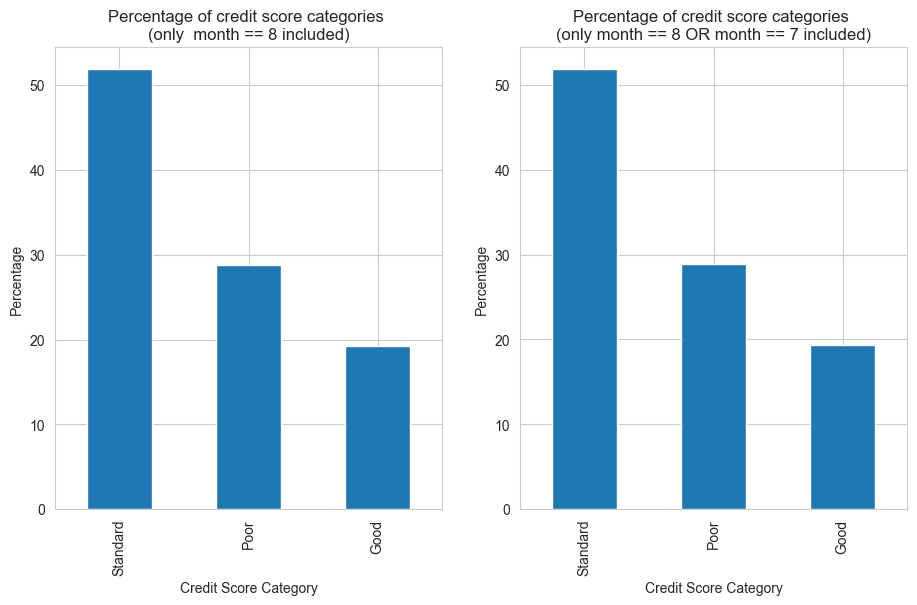

In [6]:
fig, axs = plt.subplots(1,2, figsize=(11,6))
df8 = df.query('Month == 8')
df78= df.query('Month == 8 or Month == 7')


# Plot for 'data' DataFrame
(df8['Credit_Score'].value_counts(normalize = True)*100).plot(kind='bar', ax=axs[0])
axs[0].set_title('Percentage of credit score categories \n(only  month == 8 included)')
axs[0].set_ylabel('Percentage')
axs[0].set_xlabel('Credit Score Category')

# Plot for 'data_reduced' DataFrame
(df78['Credit_Score'].value_counts(normalize = True)*100).plot(kind='bar', ax=axs[1])
axs[1].set_title('Percentage of credit score categories \n(only month == 8 OR month == 7 included)')
axs[1].set_ylabel('Percentage')
axs[1].set_xlabel('Credit Score Category')

#plt.tight_layout()
plt.show()

In [7]:
#printing the counts:
print('Count of credit score categories (only month == 8 included):')
print((df8['Credit_Score'].value_counts(normalize = False)).reset_index())
print('\n\n')
print('Count of credit score categories (only month == 8 OR month == 7 included):')
print((df78['Credit_Score'].value_counts(normalize = False)).reset_index())

Count of credit score categories (only month == 8 included):
  Credit_Score  count
0     Standard   6485
1         Poor   3602
2         Good   2413



Count of credit score categories (only month == 8 OR month == 7 included):
  Credit_Score  count
0     Standard  12960
1         Poor   7216
2         Good   4824


In [8]:
#printing the percentages:
print('Percentage of credit score categories (only for month == 8):')
print((df8['Credit_Score'].value_counts(normalize = True)*100).reset_index())
print('\n\n')
print('Percentage of credit score categories (month == 8 OR month == 7):')
print((df78['Credit_Score'].value_counts(normalize = True)*100).reset_index())

Percentage of credit score categories (only for month == 8):
  Credit_Score  proportion
0     Standard      51.880
1         Poor      28.816
2         Good      19.304



Percentage of credit score categories (month == 8 OR month == 7):
  Credit_Score  proportion
0     Standard      51.840
1         Poor      28.864
2         Good      19.296


What about a different combination? (month == 1 OR 8)

In [9]:
df18 = df.query('Month == 8 or Month == 1')

#printing the counts:
print('Count of credit score categories (only month == 8 included):')
print((df8['Credit_Score'].value_counts(normalize = False)).reset_index())
print('\n\n')
print('Count of credit score categories (only month == 8 OR month == 1 included):')
print((df18['Credit_Score'].value_counts(normalize = False)).reset_index())

print('\n\n------------\n\n')

#printing the percentages:
print('Percentage of credit score categories (only for month == 8):')
print((df8['Credit_Score'].value_counts(normalize = True)*100).reset_index())
print('\n\n')
print('Percentage of credit score categories (month == 8 OR month == 1 included):')
print((df18['Credit_Score'].value_counts(normalize = True)*100).reset_index())

Count of credit score categories (only month == 8 included):
  Credit_Score  count
0     Standard   6485
1         Poor   3602
2         Good   2413



Count of credit score categories (only month == 8 OR month == 1 included):
  Credit_Score  count
0     Standard  13428
1         Poor   7184
2         Good   4388


------------


Percentage of credit score categories (only for month == 8):
  Credit_Score  proportion
0     Standard      51.880
1         Poor      28.816
2         Good      19.304



Percentage of credit score categories (month == 8 OR month == 1 included):
  Credit_Score  proportion
0     Standard      53.712
1         Poor      28.736
2         Good      17.552


**I decided to  keep the subset with most current month (month == 8) per Customer_ID. There are no big differences on the count of classes of the target variable between the above subsets**.

Note: Normally I should check all the numerical feature's distributions, categorical features' classes counts and percentages of the above subsets. For reasons of simplicity, I make the assumption that there are no significant changes of features' characteristics when choosing my final subset.

**Assigning subset to df Dataframe**:

In [10]:
data = df.query('Month == 8')
data.shape

(12500, 26)

Which features should I drop first, as they will be no useful in modelling phase?

In [11]:
df.columns.values

array(['ID', 'Customer_ID', 'Month', 'Age', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly',
       'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score'],
      dtype=object)

Features **Month** and **ID** are obsolete and will be dropped:

In [12]:
# dropping features and resetting indexL
data = data.drop(['ID','Month'], axis = 1, inplace = False).reset_index().drop(['index'], axis = 1, inplace = False)
data.shape

(12500, 24)

In [13]:
data

,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,3392,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",...,Good,809.98,23.933795,271.0,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard
1,8625,28.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,credit-builder loan,...,Good,605.03,32.933856,326.0,No,18.816215,40.391238,Low_spent_Small_value_payments,356.078109,Good
2,11708,34.0,Engineer,143162.64,12187.220000,1.0,5.0,8.0,3.0,"auto loan,auto loan,not specified",...,Good,1303.01,26.519815,220.0,No,246.992319,168.413703,High_spent_Small_value_payments,895.494583,Standard
3,47249,55.0,Entrepreneur,30689.89,2612.490833,2.0,5.0,4.0,1.0,not specified,...,Good,632.46,27.332515,214.0,No,16.415452,71.283675,High_spent_Small_value_payments,379.216381,Standard
4,7387,21.0,Developer,35547.71,2853.309167,7.0,5.0,5.0,0.0,No Data,...,Standard,943.86,25.862922,375.0,Yes,0.000000,37.643638,High_spent_Small_value_payments,364.000016,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,14124,19.0,Lawyer,42903.79,3468.315833,0.0,4.0,6.0,1.0,not specified,...,Good,1079.48,35.716618,344.0,No,34.975457,31.193919,High_spent_Medium_value_payments,446.671142,Good
12496,3862,45.0,Media_Manager,16680.35,1528.029167,1.0,1.0,5.0,4.0,"payday loan,student loan,mortgage loan,not spe...",...,Good,897.16,24.972853,259.0,No,41.113561,52.951978,Low_spent_Large_value_payments,310.883806,Good
12497,44897,50.0,Writer,37188.10,3097.008333,1.0,4.0,5.0,3.0,"home equity loan,mortgage loan,student loan",...,Good,620.64,24.540510,364.0,No,84.205949,42.935566,High_spent_Medium_value_payments,432.559318,Good
12498,34304,29.0,Architect,20002.88,1929.906667,10.0,8.0,29.0,5.0,"personal loan,auto loan,mortgage loan,student ...",...,Bad,3571.70,37.140784,75.0,Yes,60.964772,34.662906,High_spent_Large_value_payments,337.362988,Standard
